<a href="https://colab.research.google.com/github/rahul-727/Predictive-Analytics/blob/main/2348544_Lab7_PL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [42]:
# Load Dataset: Electricity Consumption in India
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [22]:
data.columns

Index(['Passengers'], dtype='object')

In [23]:
data.isnull().sum()

,0
Passengers,0


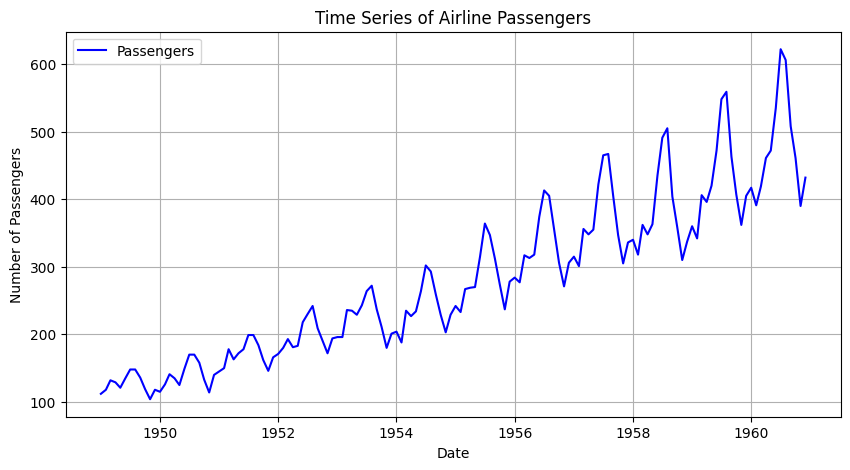

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(data, label='Passengers', color='blue')
plt.title('Time Series of Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

The time series of airline passengers exhibits a clear upward trend over the years. This means that the number of airline passengers is generally increasing over time.
* The time series shows a distinct seasonal pattern that repeats periodically

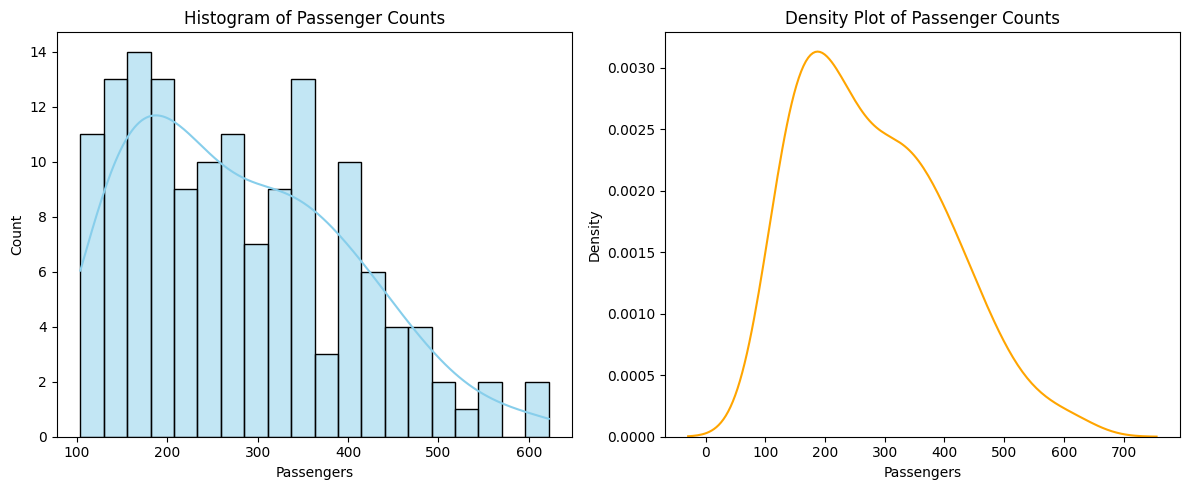

In [28]:
# Histogram and Density Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Passengers'], bins=20, kde=True, color="skyblue")
plt.title("Histogram of Passenger Counts")
plt.xlabel("Passengers")

plt.subplot(1, 2, 2)
sns.kdeplot(data['Passengers'], color="orange")
plt.title("Density Plot of Passenger Counts")
plt.xlabel("Passengers")
plt.tight_layout()
plt.show()

* The histogram shows that the distribution of passenger counts is right-skewed (positively skewed). This means that the majority of the passenger counts fall within the lower range
* The histogram's highest bars indicate the most frequent range of passenger counts, which appears to be around 100-200 passengers.

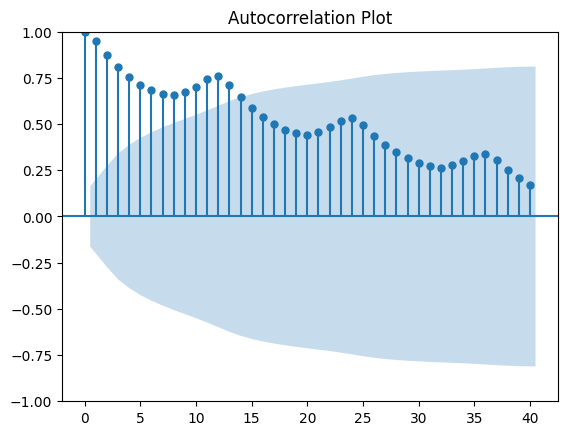

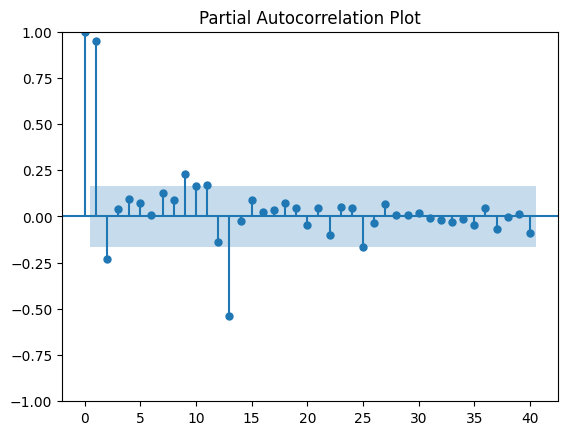

In [29]:
# ACF and PACF plots
plot_acf(data['Passengers'], lags=40)
plt.title("Autocorrelation Plot")
plt.show()

plot_pacf(data['Passengers'], lags=40)
plt.title("Partial Autocorrelation Plot")
plt.show()

*  The ACF plot shows a gradual decay, indicating a strong correlation between the current data point and its past values (lags). This suggests a potential trend and/or seasonality in the data due to the slowly decaying correlations.
* The PACF plot shows significant spikes for the first few lags, followed by a sharp drop. The significant lags in the PACF plot can be used to determine the order of the autoregressive (AR) component in a time series model like ARIMA.

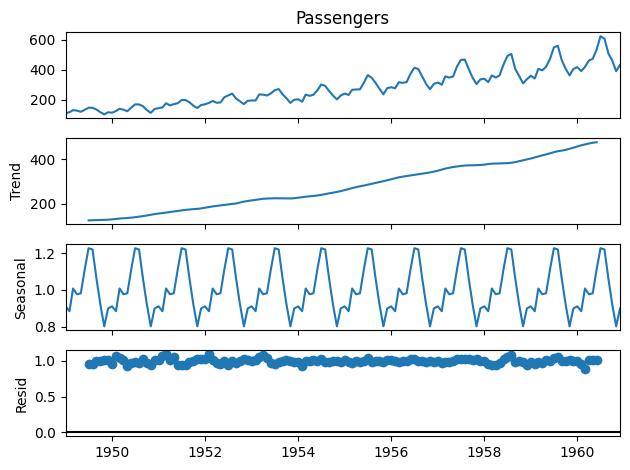

In [30]:
# Seasonal Decomposition
result = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)
result.plot()
plt.show()

* Trend: The trend component shows a clear upward pattern, indicating a general increase in the number of airline passengers over time. This suggests that the overall direction of the time series is positive.
* Seasonality: The seasonal component exhibits a recurring pattern, with regular peaks and troughs. This indicates that there is a consistent seasonal influence on the number of passengers. The pattern appears to have a yearly cycle, likely reflecting seasonal travel patterns.

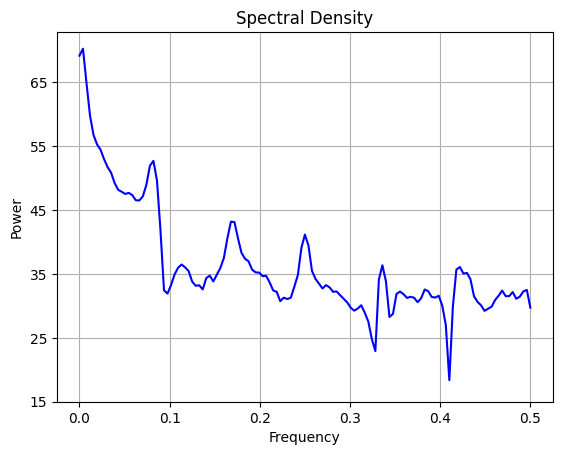

In [31]:
# Spectral Analysis
freqs, psd = plt.psd(data['Passengers'], NFFT=256, Fs=1, color="blue")
plt.title("Spectral Density")
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

* The plot shows a prominent peak at a low frequency. This corresponds to the long-term trend we observed in the previous analyses. The presence of a strong low-frequency component confirms the existence of a trend in the data.
*  There are smaller peaks at higher frequencies, which are likely related to the seasonal patterns in the data.

In [32]:
# Clustering before Classification
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

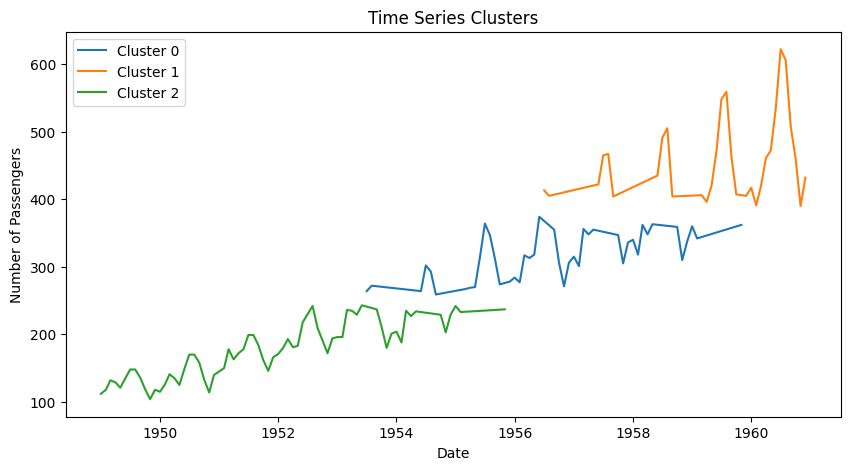

In [33]:
# Plot clusters
plt.figure(figsize=(10, 5))
for cluster in range(3):
    cluster_data = data[data['Cluster'] == cluster]
    plt.plot(cluster_data.index, cluster_data['Passengers'], label=f'Cluster {cluster}')
plt.title("Time Series Clusters")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

* K-means has identified distinct groups within the data based on the patterns in the time series.
* Cluster 0: This cluster represents the initial period of the time series with lower passenger counts and a relatively flat trend.
* Cluster 1: This cluster captures the middle period with a moderate increase in passenger counts and a more pronounced upward trend.
* Cluster 2: This cluster represents the later period with the highest passenger counts and a steep upward trend.

In [34]:
# Train ARIMA Model
train_size = int(len(data) * 0.8)
train, test = data['Passengers'][:train_size], data['Passengers'][train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
# Forecast
forecast = model_fit.forecast(steps=len(test))
test_forecast = forecast

# Evaluation Metrics
mae = mean_absolute_error(test, test_forecast)
rmse = sqrt(mean_squared_error(test, test_forecast))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 67.38350059333469
Root Mean Squared Error (RMSE): 80.66394528882644


*  The MAE of 67.38 indicates that, on average, the model's predictions are off by approximately 67.38 passengers from the actual values. This provides a measure of the average magnitude of errors in the forecast.
* The RMSE of 80.66 represents the square root of the average squared errors. It is more sensitive to larger errors compared to MAE. An RMSE of 80.66 suggests that the model's predictions can deviate from the actual values by up to 80.66 passengers or more in some cases.

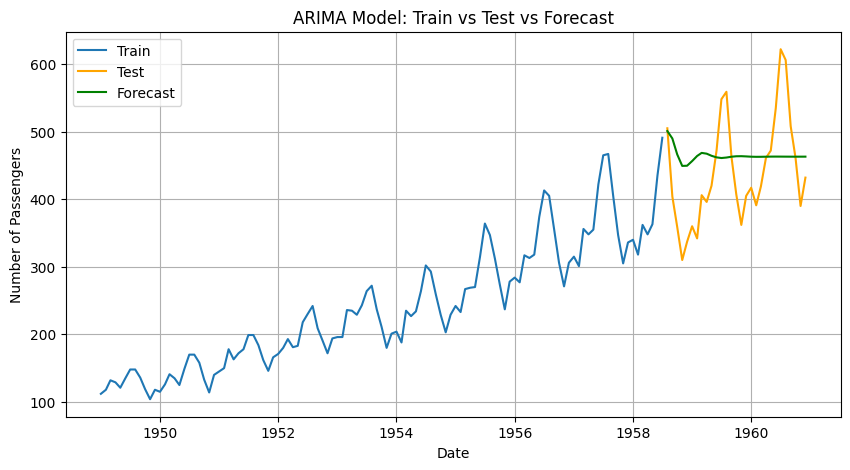

In [36]:
# Plot predictions vs actuals
plt.figure(figsize=(10, 5))
plt.plot(train, label="Train")
plt.plot(test, label="Test", color="orange")
plt.plot(test.index, test_forecast, label="Forecast", color="green")
plt.title("ARIMA Model: Train vs Test vs Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()

It seems the forecasted values (green) are relatively flat and fail to capture the sharp peaks and troughs of the actual test data (orange). This indicates the ARIMA model might not be capturing the full complexity of the time series, such as seasonal variations.

In [43]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
data.columns = ['Passengers']

# Split the data into train and test sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Define SARIMA parameters (p, d, q) x (P, D, Q, m)
p, d, q = 1, 1, 1       # Non-seasonal parameters
P, D, Q, m = 1, 1, 1, 12  # Seasonal parameters (m=12 for monthly seasonality)

# Fit the SARIMA model
sarima_model = SARIMAX(train['Passengers'],
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, m),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_fit = sarima_model.fit(disp=False)

# Forecast on the test set
sarima_forecast = sarima_fit.forecast(steps=len(test))

# Evaluate the SARIMA model
mae = mean_absolute_error(test['Passengers'], sarima_forecast)
rmse = sqrt(mean_squared_error(test['Passengers'], sarima_forecast))

print(f"SARIMA Model - Mean Absolute Error (MAE): {mae}")
print(f"SARIMA Model - Root Mean Squared Error (RMSE): {rmse}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA Model - Mean Absolute Error (MAE): 25.268045888933074
SARIMA Model - Root Mean Squared Error (RMSE): 31.787297684979638


* The MAE of 25.27 indicates that, on average, the SARIMA model's predictions are off by approximately 25.27 passengers from the actual values. This represents a significant improvement compared to the ARIMA model's MAE of 67.38.

* RMSE of 31.79 is considerably lower than the ARIMA model's RMSE of 80.66, indicating a substantial reduction in prediction errors.

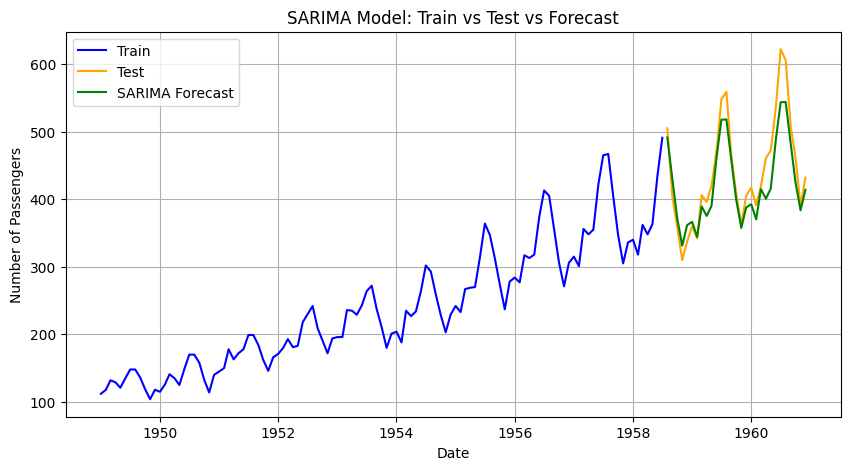

In [45]:
# Plot the Train, Test, and Forecasted values
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['Passengers'], label='Train', color='blue')
plt.plot(test.index, test['Passengers'], label='Test', color='orange')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.title("SARIMA Model: Train vs Test vs Forecast")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid(True)
plt.show()

we can see the green line follows the pattern it seems sarima model was able to forecast better than arima model